In [1]:
!pip install matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 1.2 MB/s eta 0:00:00a 0:00:01


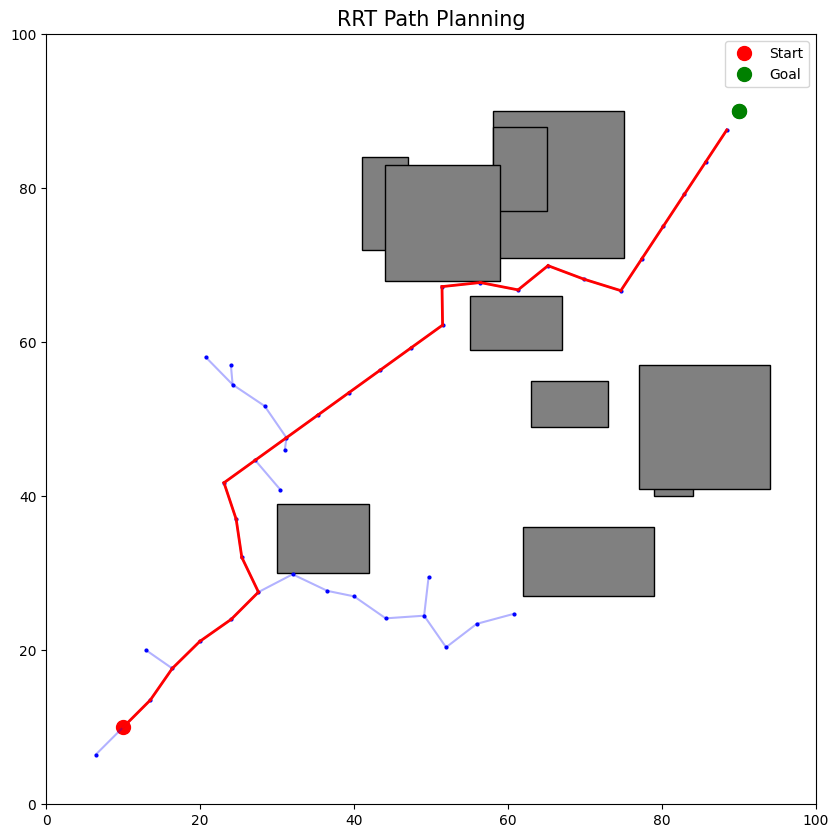

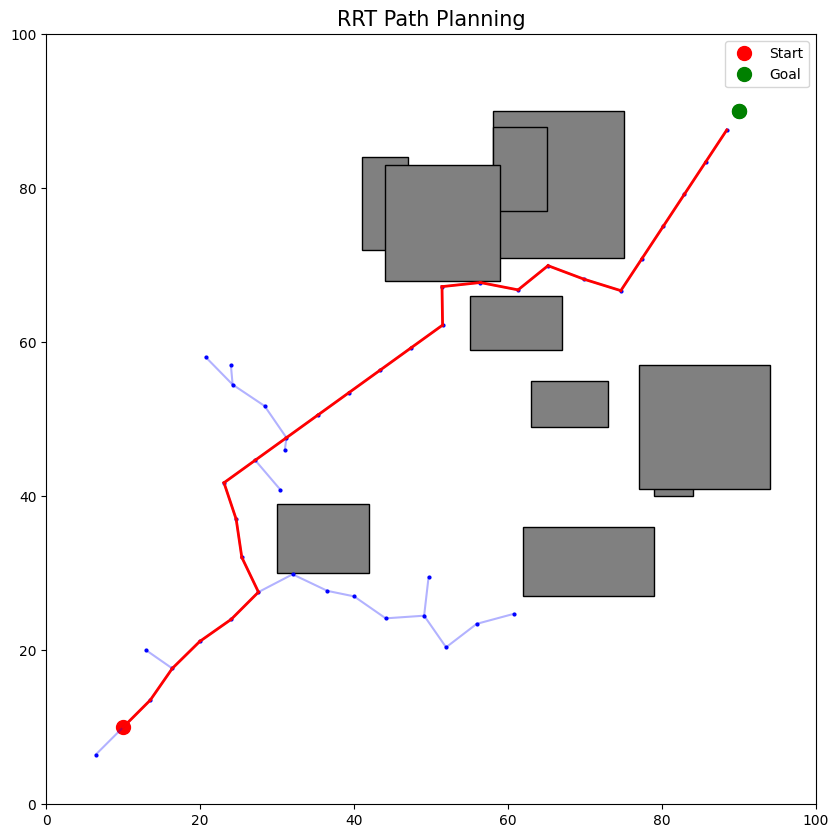

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from IPython.display import display, clear_output
import time

# 设置随机种子（可选）
np.random.seed(42)

# 初始化画布
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect('equal')
ax.set_title('RRT Path Planning', fontsize=15)

# 定义起点、终点
start = np.array([10, 10])
goal = np.array([90, 90])

# 绘制起点和终点
ax.plot(start[0], start[1], 'ro', markersize=10, label='Start')
ax.plot(goal[0], goal[1], 'go', markersize=10, label='Goal')

# 随机生成障碍物（矩形）
def generate_obstacles(num_obstacles):
    obstacles = []
    for _ in range(num_obstacles):
        x = np.random.randint(20, 80)
        y = np.random.randint(20, 80)
        width = np.random.randint(5, 20)
        height = np.random.randint(5, 20)
        obstacles.append((x, y, width, height))
        # 绘制障碍物
        rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='k', facecolor='gray')
        ax.add_patch(rect)
    return obstacles

obstacles = generate_obstacles(10)
ax.legend()

# 碰撞检测（判断线段是否与障碍物相交）
def is_collision(p1, p2):
    for (x, y, w, h) in obstacles:
        # 检查线段是否与矩形相交（简化版：用中点采样）
        for t in np.linspace(0, 1, 10):
            px = p1[0] + t * (p2[0] - p1[0])
            py = p1[1] + t * (p2[1] - p1[1])
            if x <= px <= x + w and y <= py <= y + h:
                return True
    return False

# RRT算法实现
def rrt_planning(start, goal, max_iter=1000, step_size=5):
    tree = {tuple(start): None}  # 用字典存储树结构（key: 节点, value: 父节点）
    
    for _ in range(max_iter):
        # 随机采样（90%偏向目标点，加速收敛）
        if np.random.rand() < 0.1:
            q_rand = np.array([np.random.randint(0, 100), np.random.randint(0, 100)])
        else:
            q_rand = goal
            
        # 找到最近的节点
        q_near = min(tree.keys(), key=lambda q: np.linalg.norm(np.array(q) - q_rand))
        q_near = np.array(q_near)
        
        # 向q_rand方向移动step_size
        direction = q_rand - q_near
        distance = np.linalg.norm(direction)
        if distance > step_size:
            direction = direction / distance * step_size
        q_new = q_near + direction
        
        # 碰撞检测
        if not is_collision(q_near, q_new):
            tree[tuple(q_new)] = tuple(q_near)
            
            # 绘制新节点和边
            ax.plot([q_near[0], q_new[0]], [q_near[1], q_new[1]], 'b-', alpha=0.3)
            ax.plot(q_new[0], q_new[1], 'bo', markersize=2)
            
            # 动态显示（每50次迭代更新一次）
            if _ % 50 == 0:
                clear_output(wait=True)
                display(fig)
                time.sleep(0.1)
            
            # 检查是否到达目标附近
            if np.linalg.norm(q_new - goal) < step_size:
                print("Path found!")
                # 回溯路径
                path = []
                current = tuple(q_new)
                while current is not None:
                    path.append(current)
                    current = tree[current]
                path.reverse()
                
                # 绘制最终路径
                for i in range(len(path) - 1):
                    ax.plot([path[i][0], path[i+1][0]], [path[i][1], path[i+1][1]], 'r-', linewidth=2)
                ax.plot(goal[0], goal[1], 'go', markersize=10)
                clear_output(wait=True)
                display(fig)
                return path
    print("Reached max iterations!")
    return None

# 运行RRT
path = rrt_planning(start, goal, max_iter=1000, step_size=5)
plt.show()